## Cross-validation

To explain overfitting, I think it’s best if we look at a dataset. There is a **red wine-quality dataset** which is quite famous. This dataset has 11 different attributes that decide the quality of red wine.

These attributes include:
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol

Based on these different attributes, we are required to predict the quality of red wine which is a value between 0 and 10.

Let’s see how this data looks like.

In [1]:
import pandas as pd
df = pd.read_csv("datasets/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

We can treat this problem either as a classification problem or as a regression problem since wine quality is nothing but a real number between 0 and 10. For simplicity, let’s choose classification. This dataset, however, consists of only six types of quality values. We will thus map all quality values from 0 to 5.

In [3]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = { 3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

Before we begin to understand what overfitting is, let’s divide the data into two parts. This dataset has 1599 samples. We keep 1000 samples for training and 599 as a separate set.

Splitting can be done easily by the following chunk of code:

In [4]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected # for training
df_train = df.head(1000)

# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

We will now train a decision tree model on the training set. For the decision tree model, I am going to use scikit-learn.

In [5]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']

# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

Note that I have used a *max_depth* of 3 for the decision tree classifier. I have left all other parameters of this model to its default value.

Now, we test the accuracy of this model on the training set and the test set:

In [6]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)
print(f"train_accuracy: {train_accuracy}")

# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)
print(f"test_accuracy: {test_accuracy}")

train_accuracy: 0.605
test_accuracy: 0.5158597662771286


The training and test accuracies are found to be 58.9% and 54.25%. Now we increase the *max_depth* to 7 and repeat the process. This gives training accuracy of 76.6% and test accuracy of 57.3%. Here, we have used accuracy, mainly because it is the most straightforward metric. It might not be the best metric for this problem. What about we calculate these accuracies for different values of *max_depth* and make a plot?

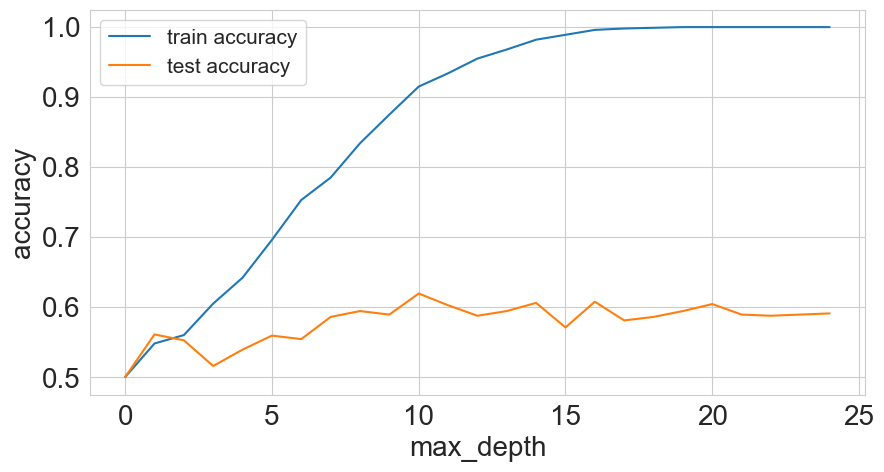

In [7]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics

# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# This line ensures that the plot is displayed
# inside the notebook
# %matplotlib inline

# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # columns/features for training
    # note that, this can be done outside
    # the loop
    cols = ['fixed acidity',
            'volatile acidity',
            'citric acid',
            'residual sugar',
            'chlorides',
            'free sulfur dioxide',
            'total sulfur dioxide',
            'density',
            'pH',
            'sulphates',
            'alcohol']
    
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    
    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

We see that the best score for test data is obtained when *max_depth* has a value of 14. As we keep increasing the value of this parameter, test accuracy remains the same or gets worse, but the training accuracy keeps increasing. It means that our simple decision tree model keeps learning about the training data better and better with an increase in *max_depth*, but the performance on test data does not improve at all.

*This is called overfitting.*

We can split any data into k-equal parts using *KFold* from scikit-learn. Each sample is assigned a value from 0 to k-1 when using k-fold cross validation.

In [8]:
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection

if __name__ == "__test__":
    # Training data is in a CSV file called train.csv
    df = pd.read_csv("train.csv")

    # we create a new column called kfold and fill it with -1
    df["kfold"] = -1

    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)

    # initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)

    # fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold

    # save the new csv with kfold column
    df.to_csv("train_folds.csv", index=False)

For the wine dataset, let’s look at the distribution of labels.

Text(0, 0.5, 'count')

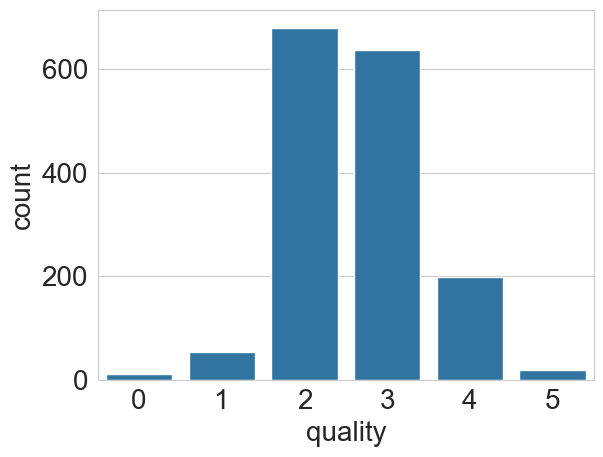

In [9]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

Let’s make a sample regression dataset and try to apply stratified k-fold as shown in the following python snippet.

In [10]:
# stratified-kfold for regression
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    # we create a new column called kfold and fill it with -1
    data["kfold"] = -1
    
    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    
    # calculate the number of bins by Sturge's rule
    # I take the floor of the value, you can also
    # just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))
    
    # bin targets
    data.loc[:, "bins"] = pd.cut(
        data["target"], bins=num_bins, labels=False
    )
    
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill the new kfold column
    # note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
    
    # drop the bins column
    data = data.drop("bins", axis=1)
    # return dataframe with folds
    return data


# we create a sample dataset with 15000 samples
# and 100 features and 1 target
X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1
)
    
# create a dataframe out of our numpy arrays
df = pd.DataFrame(
    X,
    columns=[f"f_{i}" for i in range(X.shape[1])]
)
df.loc[:, "target"] = y
    
# create folds
df = create_folds(df)
df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,0.916908,-0.389848,0.323405,2.264227,0.905310,0.917826,1.150968,0.951072,-1.393122,0.134428,...,0.187749,0.580494,0.925275,0.824429,-2.847840,0.342679,-0.427842,0.864763,302.585121,0
1,-1.039144,-1.688743,-0.139536,0.032763,-1.657134,-2.072048,-0.204328,1.982052,0.931517,-1.573428,...,-0.296427,-1.094528,-1.398517,1.671350,1.622871,1.696225,0.448138,1.206556,115.787147,0
2,-0.663381,-0.564190,1.131813,-1.087748,-0.493307,-0.710533,-0.330480,-0.510705,0.316428,-0.244948,...,-1.504325,0.247437,0.570879,1.275081,-0.961370,-0.475970,0.694787,-0.752190,9.233229,0
3,1.111115,-2.623410,0.045115,0.337194,0.131180,1.828201,0.410521,0.469744,1.465105,-0.153027,...,0.388803,-1.213751,0.519232,0.386760,1.573301,-0.535051,0.619701,-1.722983,142.096979,0
4,1.470390,-0.446578,-0.623397,1.067304,-0.344357,0.034178,-1.180988,1.585362,-1.237070,1.340283,...,-0.001202,-1.362029,-0.349466,0.416540,-0.133839,-0.584781,1.367304,1.499466,240.607615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.570205,0.397037,-0.596053,-0.274946,1.274929,0.626101,0.000836,-0.922691,1.213549,1.026012,...,0.664936,0.522592,0.026736,-0.227961,0.132755,-0.505778,-1.858754,-0.525242,-216.923893,4
14996,0.420005,0.642429,0.114441,-0.152777,1.083567,-0.010407,-0.645312,-0.663271,0.300058,-0.258830,...,0.698735,-0.480539,-0.015112,-0.525514,0.576697,0.819480,-0.356774,0.036804,115.425793,4
14997,0.964336,-1.486707,-0.078962,0.069533,-0.067696,-0.635600,0.174779,-0.199035,-1.079883,-1.342385,...,-1.566187,0.069702,0.359890,0.555062,0.627641,-0.019934,0.626804,-0.557369,-8.704531,4
14998,0.361190,-0.174299,-0.281464,-0.421514,-1.130983,1.536498,-0.181914,1.025194,0.156861,0.050851,...,0.586502,-0.365339,0.444139,-0.650501,0.318888,-0.124277,0.396582,-1.069783,-4.554770,4
